In [1]:
"""
Consider error trils, and see if neural state is interpretable.

Does both smfr and pipulation plots.
Also does euclidean distance plots

"""

'\nConsider error trils, and see if neural state is interpretable.\n\nDoes both smfr and pipulation plots.\nAlso does euclidean distance plots\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# [IN PROGRESS] Plot sm fr, splitting by gap durations, and eye gaze fixations (for beh errors, see below)

In [ ]:
# Load DFallpa either using "correct trials" version or "ALLDATA" version (see below).

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_smfr_units import _extract_pa

bregion = "preSMA"
pa = _extract_pa(DFallpa, bregion, True)



In [ ]:
dflab = pa.Xlabels["trials"]




In [ ]:
# To load gap durations and incorporate into neural data

# (2) Scatterplot, coloring by gap durations.
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import final_dfeffect_load_dfgaps_inner

### (1) Load gaps data
savedir = "/tmp"
DFGAPS, map_gapsemantic_to_dfgaps = final_dfeffect_load_dfgaps_inner([date], animal, savedir)


In [ ]:
# For each stroke, get its gap to next stroke

dflab["index_gap"] = dflab["stroke_index"] # The gap after this stroke



In [ ]:
dflab["stroke_index"] == dflab["FEAT_num_strokes_beh"]-1


In [ ]:
dflab["stroke_index"]

In [ ]:
from pythonlib.tools.pandastools import append_col_with_grp_index
DFGAPS = append_col_with_grp_index(DFGAPS, ["trialcode", "index_gap"], "tc_idxgap")
dflab = append_col_with_grp_index(dflab, ["trialcode", "index_gap"], "tc_idxgap")


In [ ]:
for x in dflab["tc_idxgap"]:
    print(x)
    assert x in DFGAPS["tc_idxgap"].unique().tolist()

In [ ]:
sorted(dflab["tc_idxgap"].unique())

In [ ]:
sorted(DFGAPS["tc_idxgap"].unique())

In [ ]:
from pythonlib.tools.pandastools import slice_by_row_label
slice_by_row_label(DFGAPS, "tc_idxgap", dflab["tc_idxgap"].tolist(), assert_exactly_one_each=True)

In [ ]:
# For each chunk_rank_shape, split into two bins, based on one of the following:
# 1. gap to next chunk
# 2. gaps within chunk.

# Then, make plots for each chunk_rank split by this, controlling for (cr, shape, location, n_in_chunk, next_loc, next_shape)

# Prediction: if you are slower, then it looks like your states are saying you are at an earlier stroke.

In [ ]:

pa.plotwrapper_smoothed_fr_split_by_label_and_subplots

In [ ]:

# ### (2) Plot scatter, overlaying gaps durations
# from pythonlib.tools.pandastools import pivot_table
# from pythonlib.tools.pandastools import slice_by_row_label
# import seaborn as sns
# from pythonlib.tools.plottools import set_axis_lims_square_bounding_data_45line

# var_datapt = "da_cr_sh_12"
# # _xvar = "dist_yue_diff-14_rankwithin_dn"
# # _yvar = "dist_yue_diff-14_rankwithin_up"
# for which_gap_semantic_higher, dfgaps_agg in map_gapsemantic_to_dfgaps.items():

#     # Assign gap duration values to dfeffect
#     if which_gap_semantic_higher == "within_chk":
#         dfeffect_this = dfeffect.copy()
#     else:
#         # Then have to prune neural data to just those neural chunks that trans from or to (depending on analysis)
#         dfeffect_this = dfeffect[dfeffect["da_cr_sh_12"].isin(dfgaps_agg["da_cr_sh_12"].unique().tolist())].reset_index(drop=True)
#     row_values = dfeffect_this["da_cr_sh_12"].tolist()
#     dftmp = slice_by_row_label(dfgaps_agg, "da_cr_sh_12", row_values, assert_exactly_one_each=True)
#     dfeffect_this["gap_dur"] = dftmp["gap_dur"]

#     # Plot!
#     from pythonlib.tools.pandastools import plot_45scatter_color_by_var
#     var_subplot = "bregion"
#     var_manip = "effect"
#     x_lev_manip = "14_rankwithin_dn"
#     y_lev_manip = "14_rankwithin_up"
#     var_color = "gap_dur"
#     fig1, fig2, fig3 = plot_45scatter_color_by_var(dfeffect_this, var_manip, x_lev_manip, y_lev_manip,
#                                             var_subplot, yvar, var_datapt, var_color)
#     savefig(fig, f"{savedir}/scatter-data={var_datapt}-colorby=gap_dur-{which_gap_semantic_higher}.pdf")            
#     savefig(fig, f"{savedir}/scatter-data={var_datapt}-x={x_lev_manip}_MIN_{y_lev_manip}-{which_gap_semantic_higher}-1.pdf")            
#     savefig(fig, f"{savedir}/scatter-data={var_datapt}-x={x_lev_manip}_MIN_{y_lev_manip}-{which_gap_semantic_higher}-2.pdf")            
#     plt.close("all")

#     # Also plot versus controls:
#     # TODO: Also plot vs. n in chunk. Prob best to use dfgaps to infer this, similar to how I did for gap_dur


In [ ]:
# STOPPING POINT:
# Decided to focus on success vs. failure, so never made plots using gaze tracking or gap durations

# [Good] Plot, split by beh error. whether is success or failure

In [ ]:
# Load dfallpa that inlcudes all data, not just correct trials
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concat_merge_pa_along_trials, dfpa_concatbregion_preprocess_wrapper, dfpa_concat_bregion_to_combined_bregion
from pythonlib.tools.exceptions import NotEnoughDataException
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/syntax_good"

# Main
animal = "Diego"
date = 230815
# animal = "Pancho"
# date = 230824

version = "stroke"
combine = False

from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concat_bregion_to_combined_bregion

### (1) load Grammar Dfallpa
question = "RULE_ANBMCK_STROKE_ALLDATA"
DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                    question=question)
DFallpa = dfpa_concat_bregion_to_combined_bregion(DFallpa)

# Make a copy of all PA before normalization
fr_mean_subtract_method = "raw_fr"
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date, fr_mean_subtract_method=fr_mean_subtract_method)

# First, load the behavioral dataset
from pythonlib.dataset.dataset import load_dataset_daily_helper

# Diego_use_main_21 = False
D = load_dataset_daily_helper(animal, date)
D.preprocessGood(params=['one_to_one_beh_task_strokes_allow_unfinished'])
# Preprocess D for grammar stuff
D.grammarparses_successbinary_score_wrapper()
for ind in range(len(D.Dat)):
    D.grammarparses_taskclass_tokens_assign_chunk_state_each_stroke(ind)
D.grammarparses_syntax_concrete_append_column()

# Get future strokes chunks info.
from pythonlib.dataset.dataset_analy.grammar import syntaxconcrete_extract_wrapper_chunks_future_errors_info
dffuture = syntaxconcrete_extract_wrapper_chunks_future_errors_info(D)

Loading DFallpa from:  /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230815-stroke-kilosort_if_exists-norm=None-combine=False-t1=-1.0-t2=1.8-quest=RULE_ANBMCK_STROKE_ALLDATA.pkl
 == (1) Matching chans across events
M1  ...  34
M1  -- n chans final:  34
PMv  ...  73
PMv  -- n chans final:  73
PMd  ...  47
PMd  -- n chans final:  47
dlPFC  ...  30
dlPFC  -- n chans final:  30
vlPFC  ...  37
vlPFC  -- n chans final:  37
FP  ...  27
FP  -- n chans final:  27
SMA  ...  51
SMA  -- n chans final:  51
preSMA  ...  58
preSMA  -- n chans final:  58
 == (2) Remove bad chans based on drift
GOOD!! -- passed all tests, channels match (sitesdirty)
============== REMOVING DIRTY SITES:
... bregion  M1 ... event  00_stroke
Removing these bad chans: [1001, 1022]
Chans exist in PA: [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1010, 1011, 1012, 1013, 1016, 1017, 1018, 1019, 1021, 1022, 1025, 1027, 1028, 1029, 1030, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044]
c

In [ ]:
for ind in range(len(D.Dat)):
    x = D.sequence_compute_each_task_stroke_only_one_beh(ind)
    if x is False:
        print(ind, x)

In [ ]:
D.grammarparses_print_plot_summarize(119)

In [ ]:
dffuture = syntaxconcrete_extract_wrapper_chunks_future_errors_info(D)

In [ ]:
for ind in range(len(D.Dat)):
    corrects = D.grammarparses_syntax_each_stroke_error_failure(ind)
    print(ind, " -- ", corrects)

In [ ]:
TkBeh = D.taskclass_tokens_extract_wrapper(ind, "beh_using_task_data", return_as_tokensclass=True) # what did
TkCorrect = D.grammarparses_task_tokens_correct_order_sequence(ind, return_as_tokensclass=True) # what should have done


In [ ]:
len(TkBeh.Tokens)

In [ ]:
for tokb, tokc in zip(TkBeh.Tokens, TkCorrect.Tokens):
    print(tokb["ind_taskstroke_orig"], tokc["ind_taskstroke_orig"])

In [ ]:
D.grammarparses_print_plot_summarize(ind)

In [ ]:
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/syntax_good/ERRORS/sm_fr_units/{animal}-{date}"

In [ ]:
from neuralmonkey.scripts.analy_syntax_errors_smfr_pop import plotwrapper_smfr_units
plotwrapper_smfr_units(DFallpa, dffuture, SAVEDIR)

In [ ]:
# Older code, devo, not needed?? Ways to get grammar/chunks info for each stroke
if False:
    info = syntaxconcrete_extract_more_info(sc, 6)
    info
    # To load gap durations and incorporate into neural data

    # (2) Scatterplot, coloring by gap durations.
    from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import final_dfeffect_load_dfgaps_inner

    ### (1) Load gaps data
    savedir = "/tmp"
    DFGAPS, map_gapsemantic_to_dfgaps = final_dfeffect_load_dfgaps_inner([date], animal, savedir)
    
    from pythonlib.dataset.dataset_analy.grammar import syntaxconcrete_extract_more_info_eye_fixation

    for i, row in dflab.iterrows():
        syntaxconcrete_extract_more_info_eye_fixation(row["syntax_concrete"], -1, )

### Population plots, error trials

pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (32, 3430, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (32, 3430, 280)
('dummy', 'llCV3', 'line-6-2-0')  --  0
('dummy', 'llCV3', 'line-6-1-0')  --  1
('dummy', 'llCV3', 'arcdeep-4-3-0')  --  2
Pruned:  (32, 3430, 280)  -->  (32, 3430, 280)
Good!! dflab and dffuture are exactly algined
Done, merged into dflab
Saved to:  /tmp/Diego-230815/bregion=M1/counts-orig.txt
Pruned:  (32, 3430, 130)  -->  (32, 3430, 130)
Saved to:  /tmp/Diego-230815/bregion=M1/counts-final.txt
Added these columns to dflab:  ['syntax_slot_0', 'syntax_slot_1', 'syntax_slot_2']
Saved to:  /tmp/Diego-230815/bregion=M1/syntax_counts-1.txt
Saved to:  /tmp/Diego-230815/bregion=M1/syntax_counts-2.txt
Saved to:  /tmp/Diego-230815/bregion=M1/syntax_counts-3.txt
Saved to:  /tmp/Diego-230815/bregion=M1/syntax_counts-4.txt
Saved to:  /tmp/Diego-230815/bregion=M1/syntax_counts-5.txt
Saved to:  /tmp/Diego-230815/bregion=M1/syntax_counts-6.

KeyboardInterrupt: 

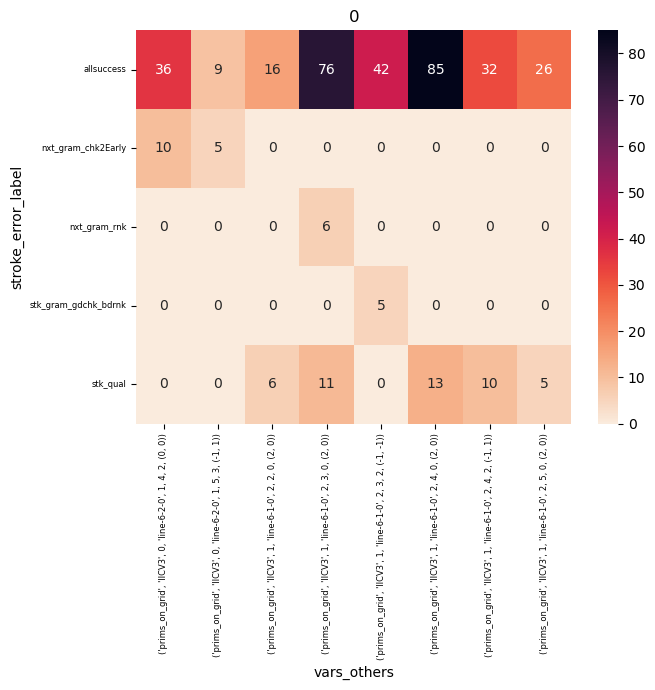

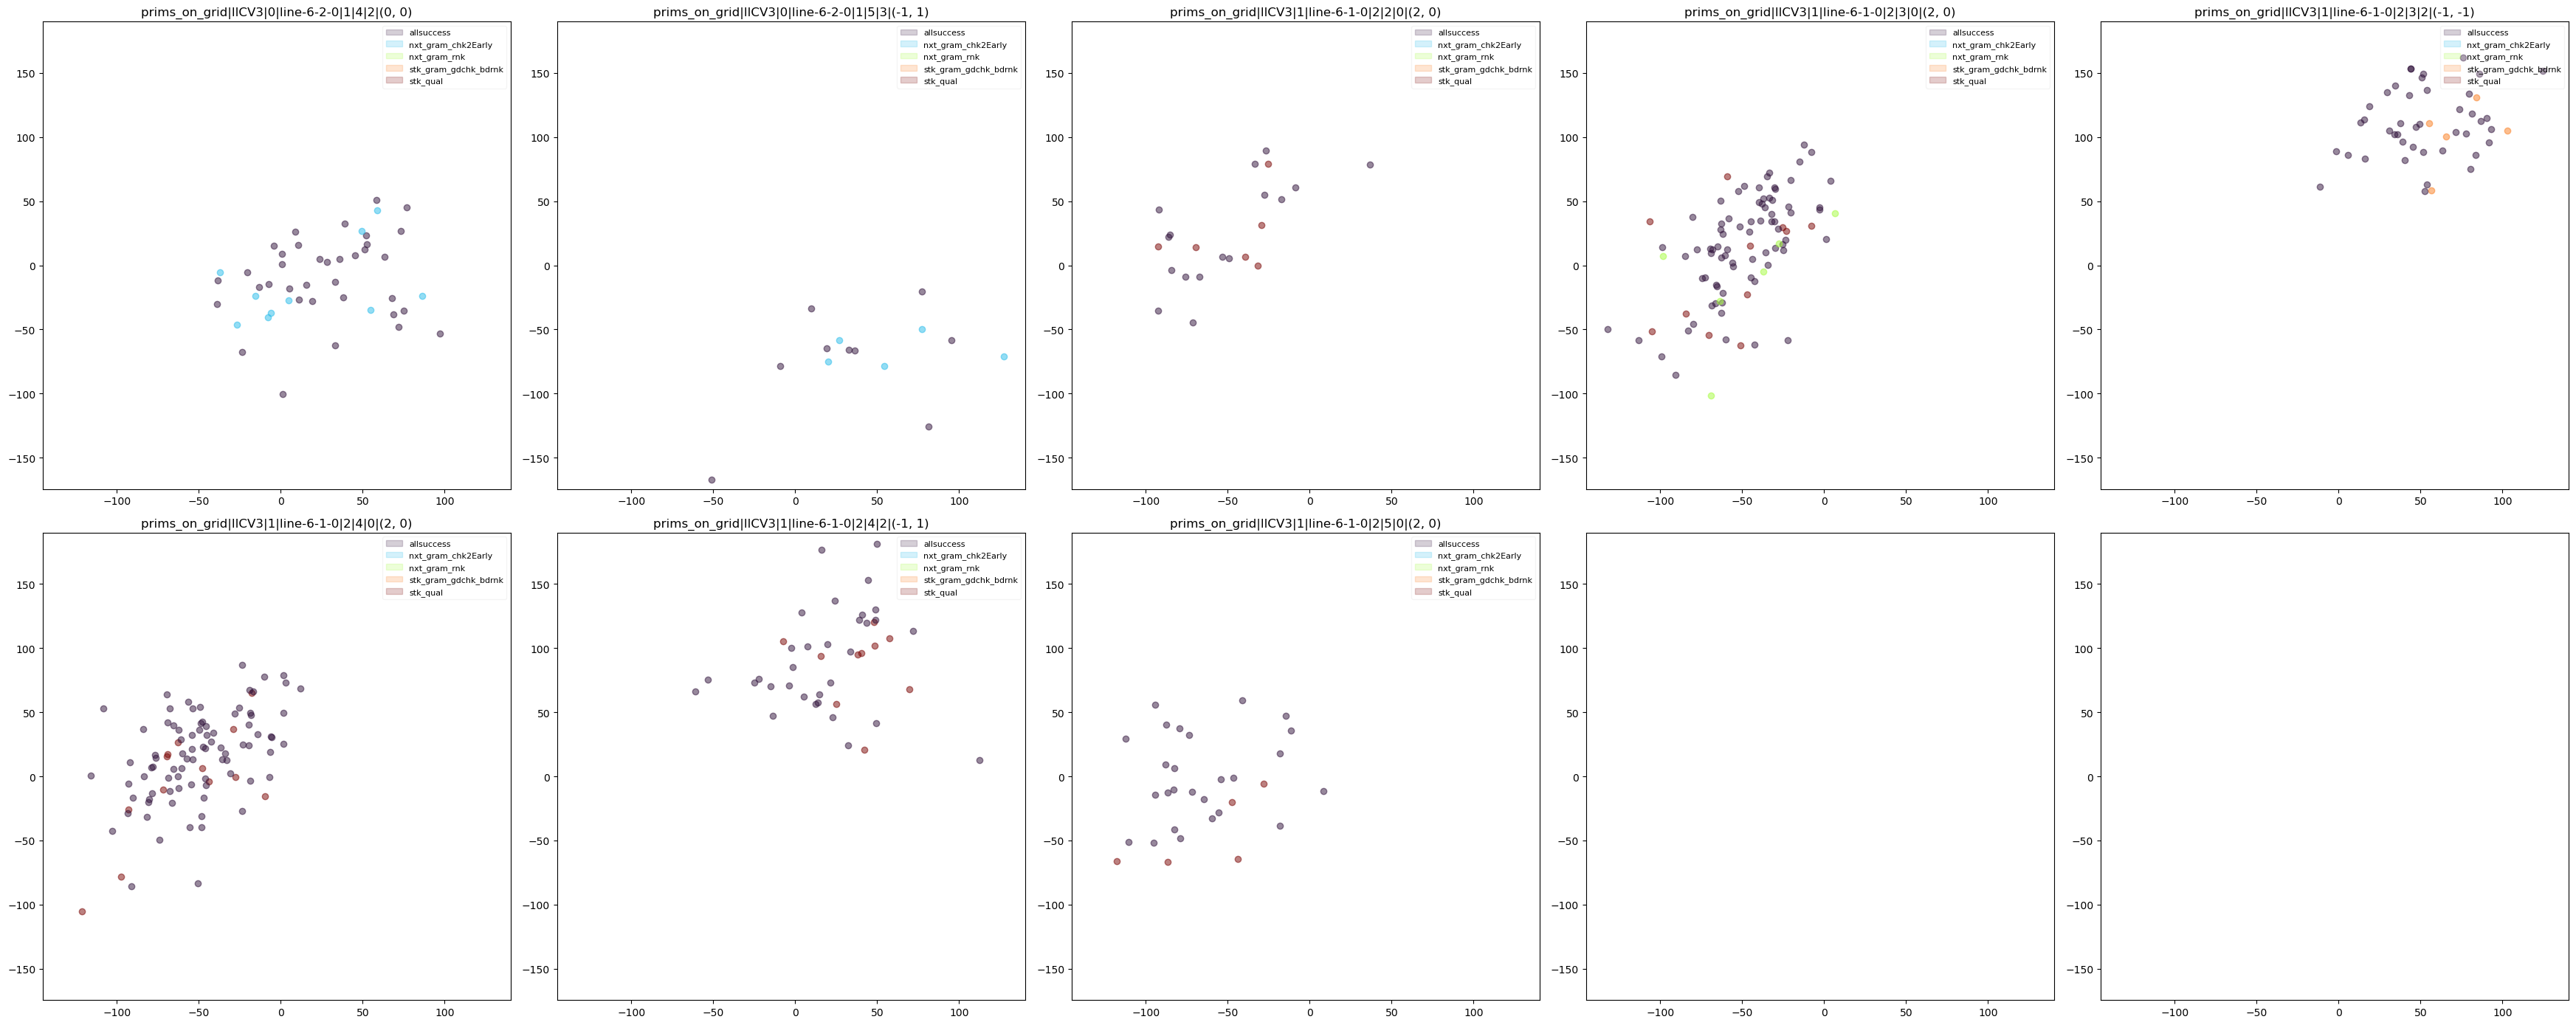

In [9]:
from neuralmonkey.scripts.analy_syntax_errors_smfr_pop import plotwrapper_pop_state_eurlidean
import os

# SAVEDIR_ALL = "/tmp/ERRORS_POP"
SAVEDIR_ALL = f"/lemur2/lucas/analyses/recordings/main/syntax_good/ERRORS/statespace_and_euclid/{animal}-{date}"
SAVEDIR_ALL = f"/tmp/{animal}-{date}"
os.makedirs(SAVEDIR_ALL, exist_ok=True)

DO_PLOT_STATESPACE = True
DO_EUCLIDEAN = True

DFDIST = plotwrapper_pop_state_eurlidean(DFallpa, dffuture, SAVEDIR_ALL, DO_PLOT_STATESPACE, DO_EUCLIDEAN)